In [2]:
import pandas as pd
import numpy as np
import pickle
from collections import Counter
import math
import requests
import html
import datetime
from datetime import timedelta, date
import string
import json
import matplotlib.pyplot as plt
import re
#from langdetect import detect

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Busca semanas com mais casos no Infodengue

### geocodes

In [47]:
geocodes_BR = pd.read_excel (r'..\inputs\Base_de_dados_dos_municipios.xls')
geocodes_BR = geocodes_BR[['UF', 'Codmundv', 'NomeMunic']]

### infodengue - Rio de Janeiro

In [48]:
municipality= 'Rio de Janeiro'.upper()
geocode_row = geocodes_BR.loc[geocodes_BR['NomeMunic'] == municipality]
geocode = list(geocode_row.iloc[:,1])[0]
url = 'https://info.dengue.mat.br/api/alertcity/?geocode=3304557&disease=dengue&format=csv&ew_start=1&ey_start=2018&ew_end=42&ey_end=2018'
r = requests.get(url)
if r:
    print('Success!')
else:
    print('An error has occurred.')

Success!


In [49]:
r.headers

{'Server': 'nginx/1.4.6 (Ubuntu)', 'Date': 'Wed, 09 Oct 2019 16:45:56 GMT', 'Content-Type': 'text/plain', 'Content-Length': '10211', 'Connection': 'keep-alive', 'X-Frame-Options': 'SAMEORIGIN', 'Vary': 'Accept-Language, Cookie, Accept-Encoding', 'Content-Language': 'pt-br', 'Content-Encoding': 'gzip'}

In [50]:
r = r.text.split('\n')

In [51]:
count = 0
for row in r:
    split_row = row.split(',')
    r[count] = split_row
    count += 1
headers = r.pop(0)

In [95]:
infodengue = pd.DataFrame(r, columns=headers)
infodengue = infodengue.iloc[:,2:6]
infodengue.head(5)

,se,data,tweets,casos
0,201833,2018-08-12,3.0,10
1,201835,2018-08-26,2.0,3
2,201822,2018-05-27,17.0,6
3,201835,2018-08-26,2.0,2
4,201836,2018-09-02,5.0,1


In [96]:
infodengue[infodengue['se'].isin(['201818', '201819', '201820'])][:10]

,se,data,tweets,casos
76,201819,2018-05-06,20.0,10
77,201820,2018-05-13,49.0,11
103,201818,2018-04-29,23.0,14
123,201818,2018-04-29,23.0,7
124,201819,2018-05-06,20.0,11
125,201820,2018-05-13,49.0,8
161,201818,2018-04-29,23.0,7
162,201819,2018-05-06,20.0,2
163,201820,2018-05-13,49.0,9
173,201820,2018-05-13,49.0,21


In [102]:
infodengue[infodengue['se'] == '201815'][:1]

,se,data,tweets,casos
100,201815,2018-04-04,19.0,12


In [69]:
infodengue['casos'] = infodengue['casos'].fillna(0).astype(int)

In [70]:
infodengue = infodengue.groupby(['se']).sum()

In [83]:
infodengue.sort_values(by=['casos'], ascending=False).head()

,casos
se,
201820,349
201815,332
201819,321
201818,285
201821,267


### draw data

In [72]:
y = infodengue.iloc[:, -1:]

In [75]:
y.head()

,casos
se,
201801,56
201802,76
201803,129
201804,102
201805,97


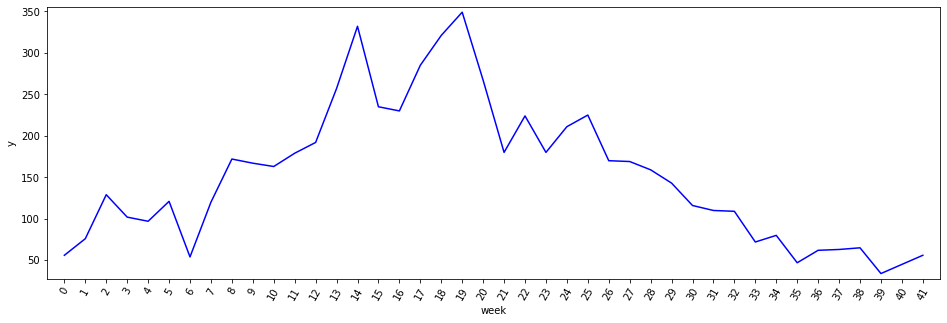

In [76]:
plt.figure(figsize=(16,5))
plt.plot(range(len(y)), y, 'b')

plt.xticks(range(len(X)), list(range(50)), rotation=60)
plt.xlabel("week")
plt.ylabel("y")
plt.margins(0.02)
plt.show()

Pelos dados analisados vemos, decidimos capturar o seguinte período: 4/4 a 27/5

# captura tweets por período definido

In [ ]:
#data = pd.read_csv("../../dados/resultado.csv", header = None)
data = pd.read_csv(r"D:\pseudo-dropbox\databases\ufmg\resultado.csv", header = None) 

* Data da mensagem
* Usuário que postou a mensagem
* Texto da mensagem
* Pontuação para  classe=paródia
* Pontuação para  classe=opinião
* Pontuação para  classe=campanha
* Pontuação para  classe=experiência pessoal
* Pontuação para  classe=informação
* Resultado (qual a classe foi escolhida pela maior pontuação)
* Informação (JSON) sobre a localização

In [ ]:
data.columns = ["date", "user", "message", "0", "1", "2", "3", "4", "class", "location"]

In [ ]:
data['date'] = pd.to_datetime(data['date'])

In [115]:
data = data_bak.copy()

In [8]:
data.dtypes

date        datetime64[ns]
user                object
message             object
0                  float64
1                  float64
2                  float64
3                  float64
4                  float64
class                int64
location            object
dtype: object

In [118]:
data = data.loc[(data['date'] >= '2018-04-04 00:00:01') & (data['date'] <= '2018-05-27 23:59:59')]

In [162]:
data.head()

,date,user,message,0,1,2,3,4,class,location
7093992,2018-05-01,Gabriellfbs,"@dlopesv Tbem to, e a maioria ta apostando nes...",0.104096,0.043642,0.274467,0.516862,0.060933,0,"{u'd': 1517850144737, u'v': 1}"
7093993,2018-05-01,SabadoWen,"RT @QuilmesMuni: SIN MOSQUITO NO HAY DENGUE, Z...",0.145344,0.120736,0.042351,0.220529,0.471039,3,"{u'd': 1517850140884, u'v': 1}"
7093994,2018-05-01,rayna_cae,Minha mãe fica de pereco pra emprestar o carro...,0.151605,0.223119,0.050216,0.494103,0.080957,0,"{u'country': u'Brasil', u'state': u'SP', u'typ..."
7093995,2018-05-01,piscinaaas,"to meio atrasada, mas vai malandra não é empod...",0.206191,0.274440,0.323303,0.188763,0.007304,4,"{u'country': u'Brasil', u'state': u'SP', u'typ..."
7093996,2018-05-01,PedreiroMarciao,"@Tom_Barreto Que foda, vc é mt Zika cara, tant...",0.183935,0.153606,0.072216,0.364444,0.225799,0,"{u'd': 1517850143411, u'v': 1}"


In [161]:
data.tail()

,date,user,message,0,1,2,3,4,class,location
7367177,2018-05-12,LuanaGrabias,O único problema de jogar horário com a Stefan...,0.201543,0.106095,0.184963,0.163534,0.343865,3,"{u'city': u'Curitiba', u'country': u'Brasil', ..."
7367178,2018-05-12,Lvia54779549,RT @marsh__ya: Eu falo que a zika tá foda meu....,0.153444,0.255296,0.010004,0.341383,0.239873,0,"{u'city': u'Batatais', u'country': u'Brasil', ..."
7367179,2018-05-12,BillHonorio,RT @destqAtleticoPR: Vai quebrando senhor toda...,0.160014,0.106730,0.000000,0.373285,0.359971,0,"{u'city': u'Curitiba', u'country': u'Brasil', ..."
7367180,2018-05-12,mechamadelel,Fica falando ai de ser como água mas so fica p...,0.330833,0.160627,0.137216,0.267142,0.104181,1,"{u'd': 1550714345555, u'v': 1}"
7367181,2018-05-12,El_Cooperante,Gobierno no publica cifras de infectados con d...,0.107856,0.198329,0.182068,0.107852,0.403896,3,"{u'city': u'Caracas', u'country': u'VE', u'coo..."


In [117]:
data.shape

(301329, 10)

### save pickle (uncomment when update is needed)

### load pickle

In [3]:
data = pickle.load(open('../../inputs/resultado_anvil_input.pkl', 'rb'))

### collect samples for each day

In [4]:
data = data.iloc[:, 0:3]

In [5]:
def change_date_format(t):
    return t.strftime('%Y-%m-%d')

In [6]:
data['date'] = data['date'].apply(lambda timeformat: change_date_format(timeformat))

In [7]:
print("The number of days is:", len(set(list(data['date']))))

The number of days is: 54


In [8]:
print("The number of required samples per day to get 1000 tweets is:", int(1000/len(set(list(data['date']))))+1)

The number of required samples per day to get 1000 tweets is: 19


In [43]:
def remove_special_char(text):
    text = re.sub('[áàãâ]', 'a', text)
    text = re.sub('[óòõô]', 'o', text)
    text = re.sub('[éèê]', 'e', text)
    text = re.sub('[íì]', 'i', text)
    text = re.sub('[úù]', 'u', text)
    text = re.sub('ç', 'c', text)
    text = re.sub('[ÁÀÃÂ]', 'A', text)
    text = re.sub('[ÓÒÕÔ]', 'O', text)
    text = re.sub('[ÉÈÊ]', 'E', text)
    text = re.sub('[ÍÌ]', 'I', text)
    text = re.sub('[ÚÙ]', 'U', text)
    text = re.sub('Ç', 'C', text)
    #text = re.sub('\\x[\w]{2}\\x[\w]{2}', '', text)
    #text = re.sub('\\u\d\d\d\d', '', text)
    #text = re.sub('\\', ' ', text)
    return text

In [45]:
tweets_object = []
count = 0
for date in set(list(data['date'])):
    data_date = data.loc[(data['date'] == date)]
    sample = data_date.sample(int(1000/len(set(list(data['date']))))+1)
    for index, row in sample.iterrows():
        sample_dict = {}
        sample_dict['id'] = index
        text = re.sub('\n+', ' ', row['message'])
        for symbol in ['¿', '¡', 'ñ']:
            if symbol in text: continue
            
        #clean_text = re.sub('\@[\w\d]+', '', text)
        #language = detect(clean_text)
        #if language  != 'pt': print (language, text, '-----', clean_text)
        #print(text)
        text = remove_special_char(text)
        sample_dict['message'] = text.encode('ascii', errors='ignore').decode('ascii')
        sample_dict['count'] = count
        tweets_object.append(sample_dict)
        count += 1
#tweets_object = tweets_object[:1000]

In [46]:
tweets_object[:10]

[{'id': 7195492,
  'message': 'Dona Danielle toda preocupada com a reputacao da Emilly kkkkkkkk Que fofo, a dona Danielle e Zika demais &lt;3 https://t.co/IDBzqFjPPc',
  'count': 0},
 {'id': 7195751,
  'message': 'RT @_vpietroo: @Netwhineous e igual amar e nao ser amado, normal zika',
  'count': 1},
 {'id': 7195692,
  'message': 'RT @nayararibeiro_m: E tanta zika com o sao paulo que ta parecendo a minha vida',
  'count': 2},
 {'id': 7195359,
  'message': 'RT @br_dadepressao: Nossa nova capa pra temporada 2018 do Brasileirao. Quem gostou deixa o like ai, se nao gostou, deixa o like tambem.  ',
  'count': 3},
 {'id': 7195580,
  'message': 'RT @CancerCaucasico: No por algo les decian Liga de Kitu. Esta clase de partidos son para Diaz, asi este triste, con dengue o con cancer al',
  'count': 4},
 {'id': 7195466,
  'message': 'RT @SandraRCReyes: Quando a gente pensa que uma doenca horrivel e uma desgraca, aparece o lado positivo. Virus da Zika pode curar tumores c',
  'count': 5},
 {'id': 7

In [47]:
len(tweets_object)

1026

In [48]:
tweets_object

[{'id': 7195492,
  'message': 'Dona Danielle toda preocupada com a reputacao da Emilly kkkkkkkk Que fofo, a dona Danielle e Zika demais &lt;3 https://t.co/IDBzqFjPPc',
  'count': 0},
 {'id': 7195751,
  'message': 'RT @_vpietroo: @Netwhineous e igual amar e nao ser amado, normal zika',
  'count': 1},
 {'id': 7195692,
  'message': 'RT @nayararibeiro_m: E tanta zika com o sao paulo que ta parecendo a minha vida',
  'count': 2},
 {'id': 7195359,
  'message': 'RT @br_dadepressao: Nossa nova capa pra temporada 2018 do Brasileirao. Quem gostou deixa o like ai, se nao gostou, deixa o like tambem.  ',
  'count': 3},
 {'id': 7195580,
  'message': 'RT @CancerCaucasico: No por algo les decian Liga de Kitu. Esta clase de partidos son para Diaz, asi este triste, con dengue o con cancer al',
  'count': 4},
 {'id': 7195466,
  'message': 'RT @SandraRCReyes: Quando a gente pensa que uma doenca horrivel e uma desgraca, aparece o lado positivo. Virus da Zika pode curar tumores c',
  'count': 5},
 {'id': 7

In [49]:
json.dump(tweets_object, open('../outputs/tweets_anvil_input.json', 'w'))

In [36]:
sample.iloc[0]['message']

'@yaszxh @japonega16 @lisandra_correa Veeeei muuuuuito top, muito lindo e eu num sou nada religioso top d+ zika'

In [42]:
test = "@mencardio: Zika Babies Born Normal Stay Normal -- So Far https://t.co/aEqiG7ode2 @ivanovich13 @torresviera @SIAC_cardio @\x00\xb7CardioTropica &')"
#test = test.encode('ascii', errors='ignore').strip().decode('ascii')
test.encode('ascii', errors='ignore').decode('ascii')

"@mencardio: Zika Babies Born Normal Stay Normal -- So Far https://t.co/aEqiG7ode2 @ivanovich13 @torresviera @SIAC_cardio @\x00CardioTropica &')"

In [3]:
isinstance(1, str)

False

In [10]:
test = False
if test == True: print("yup")